# Logistic Regression

## What we will accomplish

In this notebook we will:
- Learn the logistic regression algorithm,
- Show how you can interpret logistic regression output,
- Talk about classification cutoffs and
- Think about predicting probabilities instead of hard classification.

In [1]:
## For data handling
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns

## This sets the plot style
## to have a grid on a white background
sns.set_style("whitegrid")

## The algorithm

We will be using logistic regression for binary classification, classification problems with only two classes typically coded as $0$ or $1$. Normally the class denoted as $1$ is something we want to identify, for example someone that has a disease or someone that qualifies for a loan. 

<i>Note that logistic regression can be adapted to multi-class classification, but we will focus on that in another notebook.</i>

### From binary to continuous

<i>Logistic regression is a form of statistical regression algorithm</i>, but it is important to remember that it is in fact a statistical regression technique used to solve classification problems in supervised learning.

Remember that regression algorithms are usually used to predict continuous outcomes, but binary classification is in no way continuous. 

This is where logisitic regression is clever: instead of modeling the output class, it models the probability that a particular data point is an instance of class $1$.  This probability is a continuous function of the regressors.

Let's dive in with some random data. 

In [2]:
## Load in the randomly generated data
data = np.loadtxt("../../data/random_binary.csv",delimiter = ",")
X = data[:,0]
y = data[:,1]

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                       shuffle=True,
                                                       random_state=435,
                                                       test_size=.2,
                                                       stratify=y)

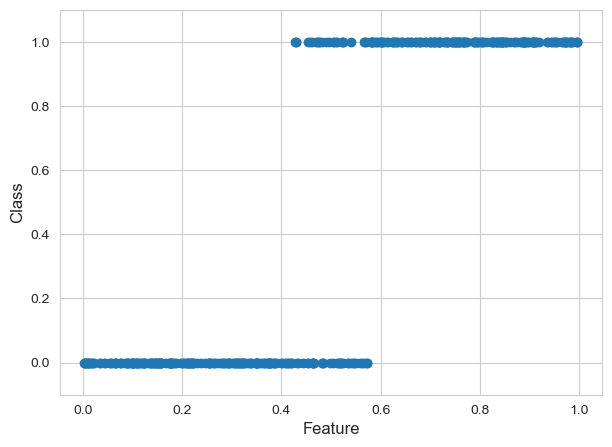

In [5]:
plt.figure(figsize = (7,5))

plt.scatter(X_train,y_train)
plt.ylim((-.1,1.1))
plt.xlabel("Feature",fontsize = 12)
plt.ylabel("Class",fontsize = 12)

plt.show()

While the vertical axis of the above plot says "Class" we could just as easily label it the "Probability the instance is $1$". In this case since we know the class of each data point in the training set, the probability can only be $0$ or $1$. Now suppose you have a new data point for which you only have the vector of predictors, $\vec{x}$. We are interested in the probability that this data point has class $y=1$, call this probability $P(y=1|\vec{x}) = p(\vec{x})$. $p(\vec{x})$ can take on all values in $[0,1]$. Attempting to estimate $p(\vec{x})$ takes us back to the realm of regression problems.

The way we model the probability in logistic regression is with a sigmoidal curve, the general form looks like this:

$$
\sigma(x) = \frac{1}{1+e^{-x}}.
$$

A graph of the curve this function produces is shown below.

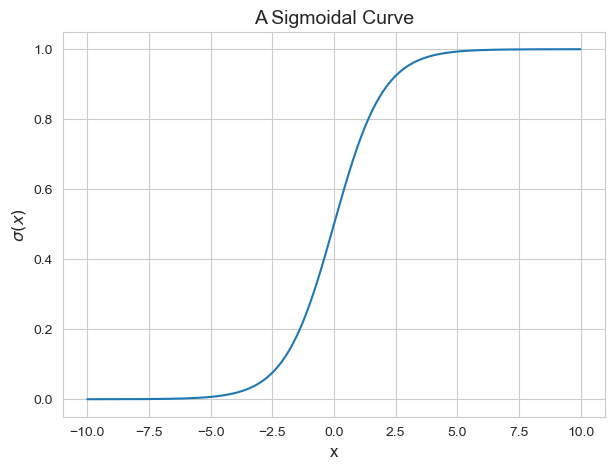

In [6]:
x = 10

plt.figure(figsize = (7,5))

plt.plot(np.arange(-x,x,.01),1/(1+np.exp(-np.arange(-x,x,.01))))


plt.xlabel("x",fontsize = 12)
plt.ylabel("$\sigma(x)$",fontsize = 12)

plt.title("A Sigmoidal Curve", fontsize=14)

plt.show()

Notice that this function stays between $0$ and $1$. Also like our phony data it transitions from class $0$, to class $1$ in a continuous manner. This is the function type we would like to use as our model.

The model that is used in logistic regression is:
$$
p(y = 1| \vec{x}) = \sigma(\beta_0 + \vec{x} \cdot \vec{\beta}) = \frac{1}{1 + e^{-(\beta_0 + \vec{x} \cdot \vec{\beta})}},
$$

The model is fit using the statistical method of maximum likelihood estimators (for a derivation of the loss function see math hour notebook from week 7).

Let's see how to use `sklearn` to fit a logistic regression model to our phony data, then see how we can use it for classification.

Logistic regression can be implemented in `sklearn` with `LogisticRegression`, <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html">https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html</a>.

In [7]:
## import LogisticRegression
from sklearn.linear_model import LogisticRegression

Before making the model object will will take a deeper look at the `sklearn` documentation for `LogisticRegression`. Look at the boxed portion of the `LogisticRegression` documentation page below:

<img src="lecture_8_assets/log_reg_docs1.png" style="width:80%"></img>

This `penalty` term should look familiar if you remember our lectures on regularization in linear regression models. Below is the portion of the documentation that touches on the `penalty` argument.

<img src="lecture_8_assets/log_reg_docs2.png" style="width:60%"></img>

<br>
<br>

What the documentation is telling us here is that by default `LogisticRegression` implements a ridge regression version of logistic regression. In our notes above we presented the logistic regression model without any penalty terms or regularization. So, if we want to use ordinary logistic regression, the model we introduced above, we need to set `penalty = None` when we define our `LogisticRegression` model object in the code chunk below.

In [8]:
## make model object
## Remember to include penalty=None when calling LogisticRegression
log_reg = LogisticRegression(penalty=None)

## fit the model
log_reg.fit(X_train.reshape(-1,1),
            y_train)

LogisticRegression(penalty=None)

In [9]:
## Demonstrate predict
log_reg.predict(X_train.reshape(-1,1))

array([1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1.,
       1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1.,
       0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0.,
       1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1.,
       1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1.,
       0., 0., 1., 0., 0.

In [10]:
## Demonstrate predict_proba
log_reg.predict_proba(X_train.reshape(-1,1))

array([[3.55469716e-03, 9.96445303e-01],
       [1.20022290e-03, 9.98799777e-01],
       [9.99932310e-01, 6.76900305e-05],
       [1.09463140e-04, 9.99890537e-01],
       [9.99990828e-01, 9.17190324e-06],
       [3.76120096e-05, 9.99962388e-01],
       [1.40415603e-03, 9.98595844e-01],
       [9.77575432e-01, 2.24245678e-02],
       [9.47227423e-01, 5.27725774e-02],
       [2.37758429e-05, 9.99976224e-01],
       [9.97628193e-01, 2.37180655e-03],
       [9.98803173e-01, 1.19682725e-03],
       [5.97024301e-04, 9.99402976e-01],
       [7.65142398e-01, 2.34857602e-01],
       [1.87545935e-04, 9.99812454e-01],
       [9.99605981e-01, 3.94018748e-04],
       [6.67940033e-01, 3.32059967e-01],
       [6.28317030e-01, 3.71682970e-01],
       [9.71284590e-01, 2.87154095e-02],
       [5.85597682e-03, 9.94144023e-01],
       [4.99363227e-04, 9.99500637e-01],
       [9.99926350e-01, 7.36499079e-05],
       [9.89094370e-01, 1.09056299e-02],
       [9.88187179e-01, 1.18128211e-02],
       [9.999677

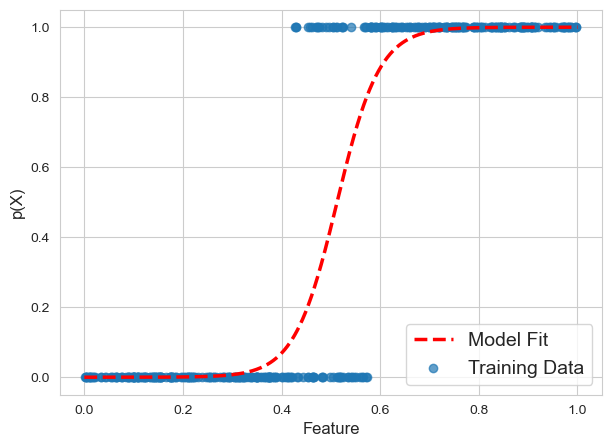

In [11]:
# Plot figure 
plt.figure(figsize = (7,5))

# With classifications we have a new method
# predict_proba which returns the probability
# that an observation is a certain class.
plt.plot(np.linspace(0,1,1000),
            log_reg.predict_proba(np.linspace(0,1,1000).reshape(-1,1))[:,1],
            'r--',linewidth=2.5,label = "Model Fit")
plt.scatter(X_train,y_train,label = 'Training Data',alpha=.7)
plt.legend(fontsize = 14,loc = 4)
plt.xlabel("Feature",fontsize = 12)
plt.ylabel("p(X)",fontsize=12) 

plt.show()

### From probabilities to classifications

The standard approach to generate classifications is to choose a probability cutoff, for instance if $p(X) \geq .5$ we classify the instance as $1$, otherwise we say it is a $0$. This is an example of a <i>decision boundary</i>, any point to the left of the boundary gets classified as a $0$, on the right a $1$. Decision boundaries are a big part of many classification algorithms, so this will not be the last time we see them.

In [12]:
## set the cutoff
cutoff = .7

## store the predicted probabilities
y_prob = log_reg.predict_proba(X_train.reshape(-1,1))[:,1]

## assign the value based on the cutoff
y_train_pred = 1*(y_prob >= .7)

## print the accuracy
## input the accuracy after "is",
print("The training accuracy for a cutoff of",cutoff,
      "is", np.sum(y_train_pred == y_train)/len(y_train))

The training accuracy for a cutoff of 0.7 is 0.9325


In [13]:
## Now plot how the accuracy changes with the cutoff
cutoffs = np.arange(0,1.01,.01)
accs = []

for cutoff in cutoffs:
    y_train_pred = 1*(y_prob >= cutoff)
    accs.append(np.sum(y_train_pred == y_train)/len(y_train))

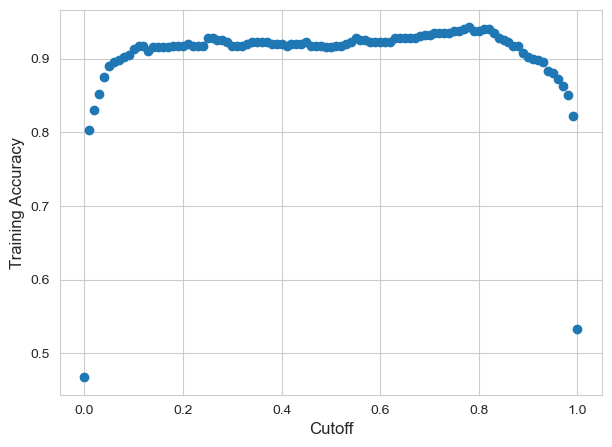

In [14]:
plt.figure(figsize=(7,5))

plt.scatter(cutoffs,accs)

plt.xlabel("Cutoff",fontsize=12)
plt.ylabel("Training Accuracy",fontsize=12)

plt.show()

You should think carefully about how you select your decision boundary for classification.

For example consider the following two extremely different scenarios:

1. You use your classifier to decide which of two advertisements, which both market the same product, to show to a user on your website.
2. You use your classifier to decide whether or not to give a patient an additional diagnostic test for cancer.

In case 1 it might be reasonable to use a decision boundary of $0.5$.

In case 2 it would be an extremely *bad* idea to only give a follow up test if you predict cancer with greater than 50% probability.  You probably want to set the threshold much lower, and your selection of the boundary should carefully weigh the costs and benefits of all 4 squares in the confusion matrix.

## Linear decision boundaries

If we have $p$ features then our fit logistic regression model will be of the form

$$
P(y = 1 | \vec{x}) = \frac{1}{1 + e^{-(\beta_0 + \beta \cdot \vec{x})}}
$$

where I have temporarily changed conventions about $\vec{x}$ including an initial $1$.

If we set a decision boundary of $c$, then this boundary is

$$
\begin{align*}
\frac{1}{1 + e^{-(\beta_0 + \beta \cdot \vec{x})}} &= c\\
1 + e^{-\beta_0 + \beta \cdot \vec{x}} &= c^{-1}\\
e^{-\beta_0 + \beta \cdot \vec{x}} &= \frac{1-c}{c}\\
\beta_0 + \beta \cdot \vec{x} &= \log(\frac{c}{1-c})\\
\beta \cdot \vec{x} &= -\beta_0 + \log(\frac{c}{1-c})
\end{align*}
$$

This is a hyperplane in $\mathbb{R}^p$.  Note that adjusting $c$ gives you a family of parallel hyperplanes.

To illustrate this, I generate two classes with multivariate normally distributed features (but different means) and plot the decision boundary using $c = 0.5$

In [15]:
X0 = np.random.multivariate_normal([2,3], [[1,0],[0,1]], 100)
X1 = np.random.multivariate_normal([4,1], [[2,1],[1,2]], 100)
X = np.concatenate([X0,X1])
y = np.concatenate([np.zeros(100),np.ones(100)])

In [16]:
model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

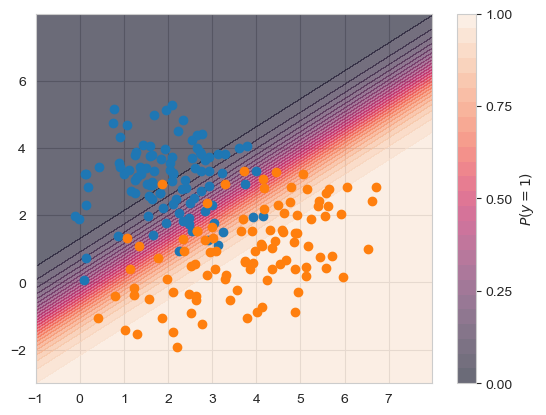

In [17]:
xx, yy = np.mgrid[-1:8:.01, -3:8:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = model.predict_proba(grid)[:, 1].reshape(xx.shape)



contour = plt.contourf(xx, yy, probs, 25, alpha = 0.6,
                      vmin=0, vmax=1)
ax_c = plt.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

plt.scatter(X0[:,0],X0[:,1])
plt.scatter(X1[:,0],X1[:,1])

plt.show()

## Interpreting logistic regression

One nice thing about this algorithm is that we can interpret the results. This is always a nice feature of an algorithm.

Reconsider the statistical model that we fit:
$$
p(y =1 | \vec{x}) = \frac{1}{1 + e^{- (\beta_0 + \vec{x} \cdot \beta)}}.
$$
Rearranging this equation and abbreviating $p(y =1 | \vec{x}) = p$ we find the following:
$$
\log\left(\frac{p}{1-p}\right) =  \beta_0 +  \vec{x} \cdot \beta.
$$

The expression $p/(1-p)$ is known as the odds of the event $y=1$. So the statistical model for logistic regression is really just a linear model for the $\log$ odds of being class $1$. This allows us to interpret the coefficients of our model.

Look at the model we just fit:

$$
\log\left(\frac{p}{1-p}\right) = \beta_0 + \beta_1 x, \text{ or } \text{Odds}|x = C e^{\beta_1 x}
$$

where $x$ is the feature, and $C$ is some constant we do not care about. 

So if we increase $x$ from say $d$ to $d+1$, a $1$ unit increase, then our odds are $e^{\beta_1}$ units times larger (or smaller depending on the value of $\beta_1$), we can see this below:
$$
\frac{\text{Odds}|x = d+1}{\text{Odds}|x=d} = \frac{e^{\beta_1 (d+1)}}{e^{\beta_1 d}} = e^{\beta_1}
$$

As a note, this interpretation does not hold if we are not performing ordinary logistic regression, so make sure you include `penalty=None` in your `LogisticRegression` model, if you want to be able to interpret your coefficients like this.

Let's look at the coefficient from our phony data logistic regression and interpret it.

In [18]:
## demonstrate log_reg.coef_
log_reg.coef_[0][0]

23.144273390434428

In [19]:
print("A .1 unit increase in our feature multiplies" + 
      " the odds of being classified as 1 by " + 
      str(np.round(np.exp(.1*log_reg.coef_[0][0]),2)))

A .1 unit increase in our feature multiplies the odds of being classified as 1 by 10.12


## Why use the sigmoid function?

It is very natural to ask why we use the sigmoid function instead of some other "S"-shaped curve.  There are a few reasons:

*  There is a very nice theory of "generlized linear models".  In brief:
    * We assume that the distribution $P(y | \vec{x})$ has a particular form which fits into an "exponential family" of distributions (in our case the Bernoulli distributions).
    * We specify a "link function" $g$ with $g(\mathbb{E}(y | \vec{x})) = \vec{x} \cdot \vec{\beta}$ (i.e. the link of the expected value is a linear function of the predictors).
    * In this setup we have a "canonical link function" (a bit technical to define).  For the Bernoulli family of distributions, $g(p) = \log(\frac{p}{1-p})$ is the canonical link function, and $g^{-1} = \sigma$.
        * The canonical link makes the calculus come out really nicely.  We saw in math hour that the gradient and hessian for logistic regression are extremely simple:  this generalizes to all generalized linear models.
* As we have already noted, the parameters are easily interpretable.

You *could* use other link functions.  A popular choice is the inverse of the cdf of the normal distribution $\Phi^{-1}$ which gives us "probit regression": we assume $\mathbb{E}(y | \vec{x}) = \Phi(\vec{x} \cdot \vec{\beta}$).
* This can be interpretted as assuming that our data generating process is that $y = 1$ when $\vec{x} \cdot \vec{\beta} + \epsilon > 0$ and $\epsilon \sim \mathcal{N}(0,1)$.
* $\Phi$ and $\sigma$ are good approximations of each other, so the results are often quite similar.
* Probit regression *is* preferable sometimes, such as when we want to avoid an assumption of [independence of irrelevant alternatives](https://en.wikipedia.org/wiki/Independence_of_irrelevant_alternatives).
* The interpretation of the model parameters is harder.
* The calculus of fitting the model is a lot harder (no nice closed form formulas).

### Algorithm Assumptions

While we were explaining the concept of logistic regression, we did not mention any of the assumptions of the algorithm. Let's talk about that here before we move on to real data.

- The log odds depend linearly on the regressors.
- The regressors are measured without error.
- The observations are independent.
- The data are not perfectly linearly seperable (i.e. there cannot be some vector $\vec{v}$ with $\vec{x} \cdot \vec{v} < 0$ for one class and $>0$ for the other class).
    - If they are, we will have $\vert \beta \vert \to \infty$ as we train the model.  The resulting $p_\beta$ will approach the indicator function of the set $\{\vec{x}: \vec{x} \cdot \vec{v} > 0\}$ as we train the model.  This isn't *horrible*, but is probably better to use something like a support vector machine in this case.
- We do not have multicollinearity of the regressors.
    - Just as in linear regression, multicolinearity will not impact our ability to accurately predict probabilities.  It only prevents us from understanding feature importance.

We did not worry about these assumptions in this notebook because the data were randomly generated to fit these assumptions. However, in real world applications you may want check them when deciding whether or not logistic regression is a good model choice. 

--------------------------

This notebook was written for the Erd&#337;s Institute C&#337;de Data Science Boot Camp by Matthew Osborne, Ph. D., 2023.

Any potential redistributors must seek and receive permission from Matthew Tyler Osborne, Ph.D. prior to redistribution. Redistribution of the material contained in this repository is conditional on acknowledgement of Matthew Tyler Osborne, Ph.D.'s original authorship and sponsorship of the Erdős Institute as subject to the license (see License.md)